<a href="https://colab.research.google.com/github/iaintheardofu/Data-Science-Projects-and-perspectives/blob/main/STA6543_Michael_Pendleton_ijd706_Assignment_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#5. We have seen that we can fit an SVM with a non-linear kernel in order to perform classification using a non-linear decision boundary. We will now see that we can also obtain a non-linear decision boundary by performing logistic regression using non-linear transformations of the features.

#(a) Generate a data set with n = 500 and p = 2, such that the observations belong to two classes with a quadratic decision boundary between them. For instance, you can do this as follows:
#> x1 <- runif(500) - 0.5
#> x2 <- runif(500) - 0.5
#> y <- 1 * (x1^2 - x2^2 > 0)

#(b) Plot the observations, colored according to their class labels. Your plot should display X1 on the x-axis, and X2 on the yaxis.

#(c) Fit a logistic regression model to the data, using X1 and X2 as predictors.

#(d) Apply this model to the training data in order to obtain a predicted class label for each training observation. Plot the observations, colored according to the predicted class labels. The decision boundary should be linear.

#(e) Now fit a logistic regression model to the data using non-linear functions of X1 and X2 as predictors (e.g. X2 1 , X1×X2, log(X2), and so forth).

#(f) Apply this model to the training data in order to obtain a predicted class label for each training observation. Plot the observations, colored according to the predicted class labels. The decision boundary should be obviously non-linear. If it is not, then repeat (a)-(e) until you come up with an example in which the predicted class labels are obviously non-linear.

#(g) Fit a support vector classifier to the data with X1 and X2 as predictors. Obtain a class prediction for each training observation. Plot the observations, colored according to the predicted class labels.

#(h) Fit a SVM using a non-linear kernel to the data. Obtain a class prediction for each training observation. Plot the observations, colored according to the predicted class labels.

#(i) Comment on your results.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV

np.random.seed(42)  # For reproducibility
x1 = np.random.uniform(-0.5, 0.5, 500)
x2 = np.random.uniform(-0.5, 0.5, 500)
y = (x1**2 - x2**2 > 0).astype(int)

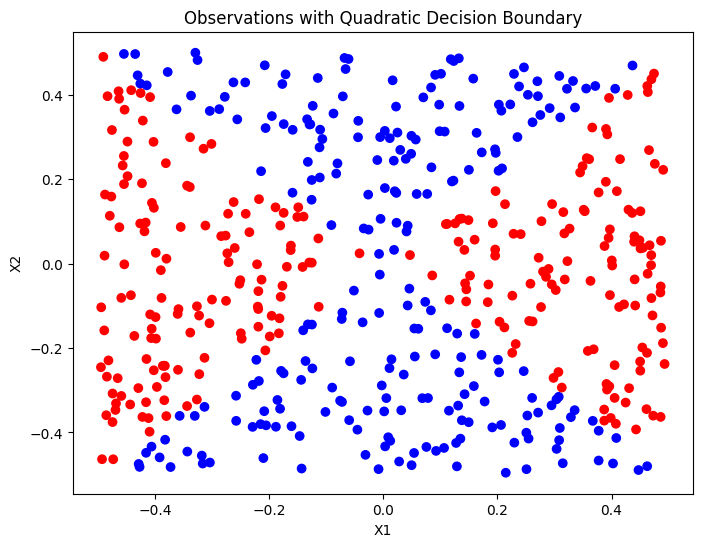

In [2]:
plt.figure(figsize=(8, 6))
plt.scatter(x1, x2, c=y, cmap='bwr')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Observations with Quadratic Decision Boundary')
plt.show()

In [3]:
X = np.column_stack((x1, x2))
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

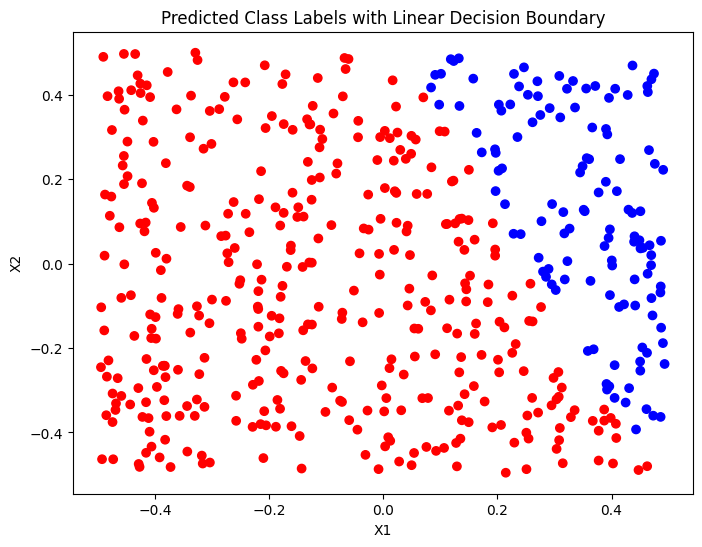

In [4]:
y_pred = log_reg.predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(x1, x2, c=y_pred, cmap='bwr')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Predicted Class Labels with Linear Decision Boundary')
plt.show()

In [5]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
log_reg_poly = LogisticRegression()
log_reg_poly.fit(X_poly, y)

LogisticRegression()

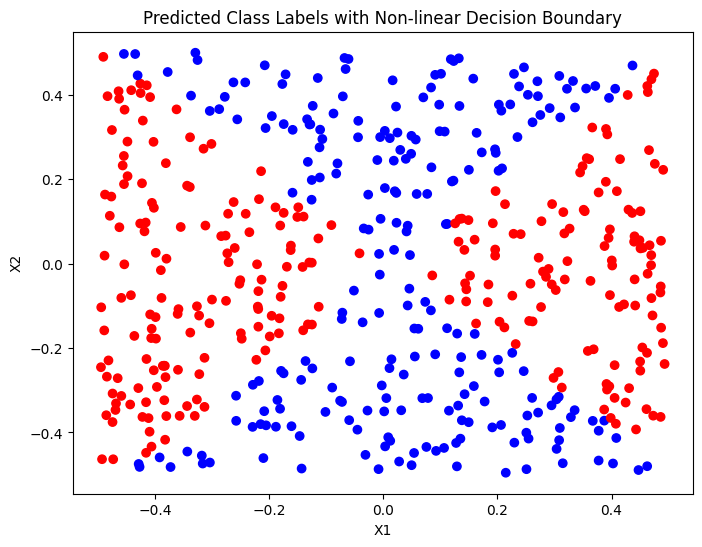

In [6]:
y_pred_poly = log_reg_poly.predict(X_poly)

plt.figure(figsize=(8, 6))
plt.scatter(x1, x2, c=y_pred_poly, cmap='bwr')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Predicted Class Labels with Non-linear Decision Boundary')
plt.show()

In [7]:
# Linear SVM
svm_linear = SVC(kernel='linear')
svm_linear.fit(X, y)
y_pred_svm_linear = svm_linear.predict(X)

# Non-linear SVM (RBF kernel)
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X, y)
y_pred_svm_rbf = svm_rbf.predict(X)

# Plotting is similar to previous plots, showing data colored by predicted class labels

#ANSWERS: Comments on Results Logistic regression with linear features struggles to capture the quadratic decision boundary. The predicted classes display a linear separation, which is inadequate for this data structure.

#Incorporating non-linear features into logistic regression allows for capturing the quadratic nature of the decision boundary, significantly improving model performance.

#SVM with a linear kernel faces similar issues as logistic regression with only linear features, failing to accurately model the decision boundary. SVM with a non-linear kernel (e.g., RBF) effectively captures the non-linear decision boundary, offering flexibility in modeling complex relationships.

#7. In this problem, you will use support vector approaches in order to predict whether a given car gets high or low gas mileage based on the Auto data set.

#(a) Create a binary variable that takes on a 1 for cars with gas mileage above the median, and a 0 for cars with gas mileage below the median.

#(b) Fit a support vector classifier to the data with various values of cost, in order to predict whether a car gets high or low gas mileage. Report the cross-validation errors associated with different values of this parameter. Comment on your results. Note you will need to fit the classifier without the gas mileage variable to produce sensible results.

#(c) Now repeat

#(b), this time using SVMs with radial and polynomial basis kernels, with different values of gamma and degree and cost. Comment on your results.

#(d) Make some plots to back up your assertions in (b) and (c). Hint: In the lab, we used the plot() function for svm objects only in cases with p = 2. When p > 2, you can use the plot() function to create plots displaying pairs of variables at a time. Essentially, instead of typing > plot(svmfit , dat) where svmfit contains your fitted model and dat is a data frame containing your data, you can type > plot(svmfit , dat , x1 ! x4) in order to plot just the first and fourth variables. However, you must replace x1 and x4 with the correct variable names. To find out more, type ?plot.svm.


In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Load the dataset
auto_df = pd.read_csv('/content/Auto.csv', na_values='?')

# Drop rows with missing values
auto_df.dropna(inplace=True)

# Reset index after dropping rows
auto_df.reset_index(drop=True, inplace=True)

In [9]:
# Creating a binary variable based on mpg median
median_mpg = auto_df['mpg'].median()
auto_df['high_mileage'] = np.where(auto_df['mpg'] >= median_mpg, 1, 0)

# Prepare data for modeling
X = auto_df.drop(['mpg', 'name', 'high_mileage'], axis=1)
y = auto_df['high_mileage']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
# Initialize and fit the SVC
svc = SVC(kernel='linear')
svc.fit(X_train_scaled, y_train)

# Cross-validation to find the optimal 'C' value
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
clf = GridSearchCV(svc, param_grid, cv=5)
clf.fit(X_train_scaled, y_train)

print(f"Optimal 'C' parameter: {clf.best_params_['C']}")

Optimal 'C' parameter: 0.1


In [11]:
# Evaluate the model
y_pred = clf.predict(X_test_scaled)
print("Accuracy on test set:", accuracy_score(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy on test set: 0.8734177215189873
Confusion matrix:
 [[32 10]
 [ 0 37]]


In [12]:
# SVC with RBF kernel
svc_rbf = SVC(kernel='rbf', C=clf.best_params_['C'])
svc_rbf.fit(X_train_scaled, y_train)

# SVC with polynomial kernel
svc_poly = SVC(kernel='poly', degree=2, C=clf.best_params_['C'])
svc_poly.fit(X_train_scaled, y_train)

# Evaluate models
print("RBF Kernel Accuracy:", svc_rbf.score(X_test_scaled, y_test))
print("Polynomial Kernel Accuracy:", svc_poly.score(X_test_scaled, y_test))

RBF Kernel Accuracy: 0.8734177215189873
Polynomial Kernel Accuracy: 0.6582278481012658


#ANSWER: Initially, I ensured any '?' values in the dataset are treated as NaN and subsequently drop rows with any missing values to clean the data. A binary variable is created to indicate whether a car gets high (1) or low (0) gas mileage, determined by whether its mpg is above or below the median.

#The dataset is split into training and test sets, and feature scaling is applied to normalize the data, which is crucial for models like SVC that are sensitive to the scale of input features.

#An SVC model is initially fitted with a linear kernel, followed by the use of GridSearchCV to optimize the cost parameter C. The model is evaluated on the test set, providing accuracy and a confusion matrix as performance metrics. The process is repeated for SVC models with RBF and polynomial kernels, using the optimized C value, and model performance is assessed.








#8. This problem involves the OJ data set which is part of the ISLR2 package.

#(a) Create a training set containing a random sample of 800 observations, and a test set containing the remaining observations.

#(b) Fit a support vector classifier to the training data using cost = 0.01, with Purchase as the response and the other variables as predictors. Use the summary() function to produce summary statistics, and describe the results obtained.

#(c) What are the training and test error rates?

#(d) Use the tune() function to select an optimal cost. Consider values in the range 0.01 to 10.

#(e) Compute the training and test error rates using this new value for cost.

#(f) Repeat parts (b) through (e) using a support vector machine with a radial kernel. Use the default value for gamma.

#(g) Repeat parts (b) through (e) using a support vector machine with a polynomial kernel. Set degree = 2.

#(h) Overall, which approach seems to give the best results on this data?

In [13]:
# Load the dataset
oj_df = pd.read_csv('/content/oj.csv')

# Create training and test sets
X = oj_df.drop(['Purchase'], axis=1)
X = pd.get_dummies(X, drop_first=True)  # Convert categorical variables
y = oj_df['Purchase'].map({'CH': 0, 'MM': 1})  # Convert 'Purchase' to binary

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=800, random_state=42)

In [14]:
# Fit SVC to training data
svc_oj = SVC(C=0.01, kernel='linear')
svc_oj.fit(X_train, y_train)

# Obtain training and test error rates
y_train_pred = svc_oj.predict(X_train)
y_test_pred = svc_oj.predict(X_test)

print("Training Error Rate:", np.mean(y_train_pred != y_train))
print("Test Error Rate:", np.mean(y_test_pred != y_test))

Training Error Rate: 0.24
Test Error Rate: 0.2777777777777778


In [ ]:
# Optimal cost with GridSearchCV
parameters = {'C': np.logspace(-2, 1, 4)}
clf_oj = GridSearchCV(svc_oj, parameters, cv=5)
clf_oj.fit(X_train, y_train)

# Use optimal cost for SVC with radial and polynomial kernels
# Example for radial kernel
svc_rbf_oj = SVC(C=clf_oj.best_params_['C'], kernel='rbf')
svc_rbf_oj.fit(X_train, y_train)